# Analysis

In [1]:
import numpy as np
from math import log
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors


In [2]:
cmap = plt.get_cmap("plasma")

cmaps = [mcolors.to_hex(cmap(0.1)), mcolors.to_hex(cmap(1/3)), mcolors.to_hex(cmap(2/3)), mcolors.to_hex(cmap(0.9))]

In [3]:
cmaps

['#41049d', '#9c179e', '#ed7953', '#fcce25']

In [4]:
os.makedirs('results/figure', exist_ok=True)

fill_between = 25th percentile ~ 75 percentile

## Entanglement Entropy

In [5]:
df_entropy = pd.read_csv('results/entropy.csv').reset_index()

In [6]:
df_describe_entropy = df_entropy[['bond', 'std', 'entropy']].groupby(['bond', 'std']).agg(entropy_median=pd.NamedAgg(column='entropy', aggfunc='median'),
                                                                                    entropy_25=pd.NamedAgg(column='entropy', aggfunc=lambda x: np.percentile(x, 25)),
                                                                                    entropy_75=pd.NamedAgg(column='entropy', aggfunc=lambda x: np.percentile(x, 75))).reset_index()

In [7]:
df_describe_entropy

,bond,std,entropy_median,entropy_25,entropy_75
0,10,0.001,5.468591e-08,5.359150e-08,5.788854e-08
1,10,0.010,3.661157e-04,3.494994e-04,3.785145e-04
2,10,0.020,5.257953e-03,4.961130e-03,5.653382e-03
3,10,0.030,2.688568e-02,2.440225e-02,3.106300e-02
4,10,0.040,9.142977e-02,8.159361e-02,1.173938e-01
...,...,...,...,...,...
204,100,0.060,4.009089e+00,3.990704e+00,4.023947e+00
205,100,0.070,4.037322e+00,4.019145e+00,4.051338e+00
206,100,0.080,4.056306e+00,4.043197e+00,4.071753e+00
207,100,0.090,4.074900e+00,4.060478e+00,4.088771e+00


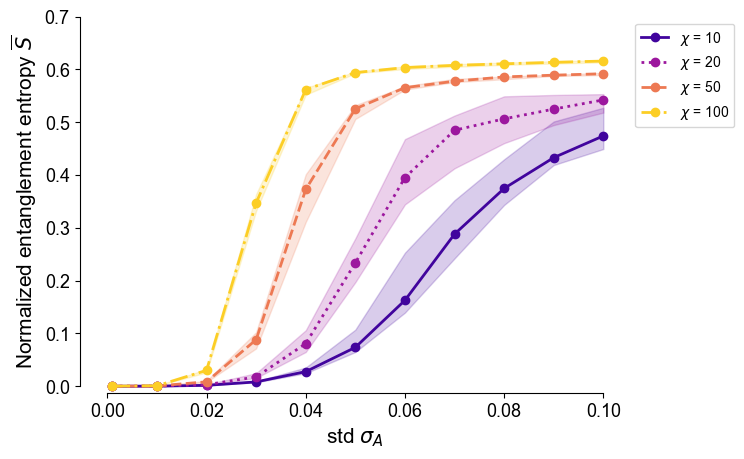

In [8]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for i, bond in enumerate(bonds):
    entropy_median = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_median']
    entropy_25 = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_25']
    entropy_75 = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_75']
    plt.plot(stds, entropy_median/log(bond,2), label = f'$\chi$ = {bond}', marker='o', markersize=6, linewidth=2, linestyle=lines[bond], color=cmaps[i], clip_on=False)
    plt.fill_between(stds, entropy_25 / log(bond,2), entropy_75 / log(bond,2), alpha=0.2, color=cmaps[i], clip_on=False)
plt.legend()
plt.xlabel('std $\sigma_A$', size=15)
plt.ylabel('Normalized entanglement entropy $\overline{S}$', size=15)

plt.xticks(size=13)
plt.yticks(size=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.xlim([0, 0.1])
plt.ylim([0.0, 0.7])

plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.tick_params(labelsize=13)
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_9_a.pdf', bbox_inches='tight')

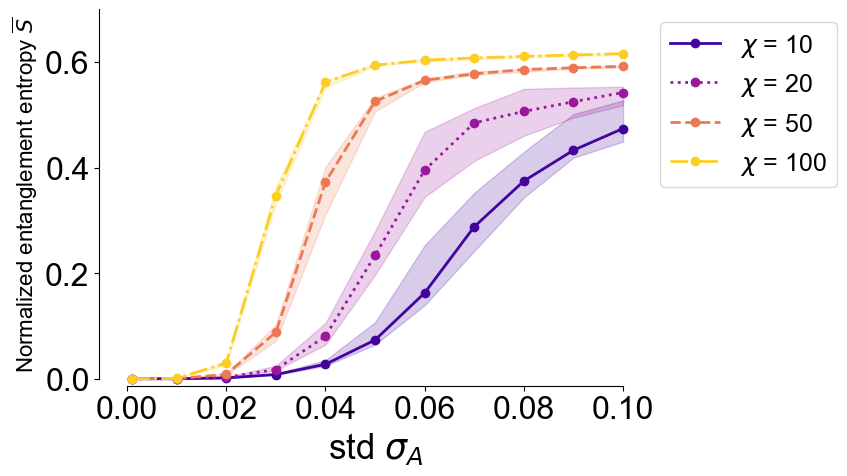

In [45]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for i, bond in enumerate(bonds):
    entropy_median = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_median']
    entropy_25 = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_25']
    entropy_75 = df_describe_entropy[(df_describe_entropy['bond'] == bond)]['entropy_75']
    plt.plot(stds, entropy_median/log(bond,2), label = f'$\chi$ = {bond}', marker='o', markersize=6, linewidth=2, linestyle=lines[bond], color=cmaps[i], clip_on=False)
    plt.fill_between(stds, entropy_25 / log(bond,2), entropy_75 / log(bond,2), alpha=0.2, color=cmaps[i], clip_on=False)
plt.legend()
plt.xlabel('std $\sigma_A$', size=25)
plt.ylabel('Normalized entanglement entropy $\overline{S}$', size=16)

plt.xticks(size=23)
plt.yticks(size=23)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.xlim([0, 0.1])
plt.ylim([0.0, 0.7])

plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1), fontsize=18)
plt.tick_params(labelsize=23)
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_9_a.pdf', bbox_inches='tight')

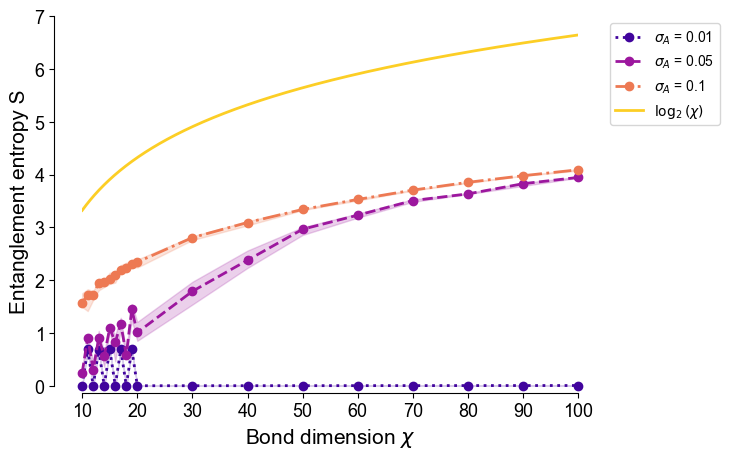

In [10]:
bonds = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
stds = [ 0.01, 0.05, 0.1]
lines = {0.01:':',0.05:'--',0.1:'-.'}
for i, std in enumerate(stds):
    entropy_median = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_median']
    entropy_25 = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_25']
    entropy_75 = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_75']

    plt.plot(bonds, entropy_median, label = f'$\sigma_A$ = {std}', marker = 'o', linestyle=lines[std], color=cmaps[i], clip_on=False, linewidth=2)
    plt.fill_between(bonds, entropy_25, entropy_75, alpha=0.2, color=cmaps[i], clip_on=False)
bonds_array = np.linspace(10, 100, 10000)
samples = np.log2(bonds_array)

plt.plot(bonds_array, samples, label = '$\log_2(\chi)$', color=cmaps[-1], linewidth=2)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

plt.xlabel('Bond dimension $\chi$', size=15)
plt.ylabel('Entanglement entropy S', size=15)

plt.xticks(size=13)
plt.yticks(size=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=13)
plt.xlim([10, 100])
plt.ylim([0.0, 7])
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_9_b.pdf', bbox_inches='tight')

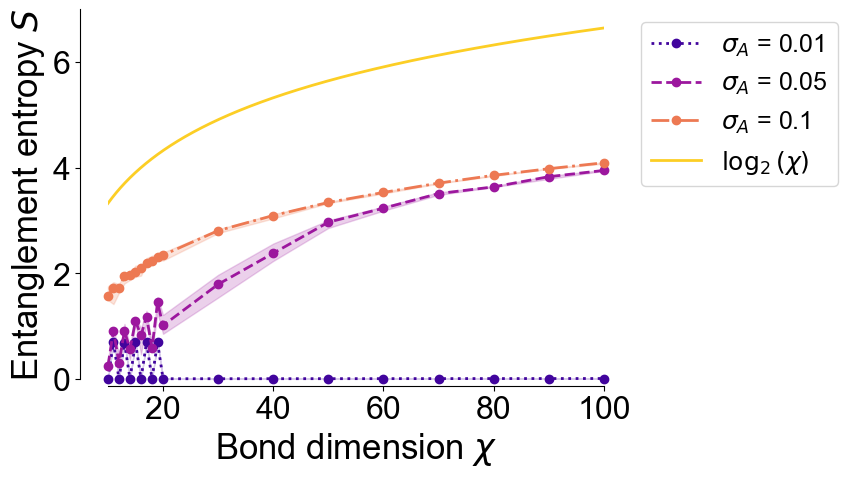

In [33]:
bonds = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
stds = [ 0.01, 0.05, 0.1]
lines = {0.01:':',0.05:'--',0.1:'-.'}
for i, std in enumerate(stds):
    entropy_median = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_median']
    entropy_25 = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_25']
    entropy_75 = df_describe_entropy[(df_describe_entropy['std'] == std)]['entropy_75']

    plt.plot(bonds, entropy_median, label = f'$\sigma_A$ = {std}', marker = 'o', linestyle=lines[std], color=cmaps[i], clip_on=False, linewidth=2)
    plt.fill_between(bonds, entropy_25, entropy_75, alpha=0.2, color=cmaps[i], clip_on=False)
bonds_array = np.linspace(10, 100, 10000)
samples = np.log2(bonds_array)

plt.plot(bonds_array, samples, label = '$\log_2(\chi)$', color=cmaps[-1], linewidth=2)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1), fontsize=18)

plt.xlabel('Bond dimension $\chi$', size=25)
plt.ylabel('Entanglement entropy $S$', size=25)

plt.xticks(size=23)
plt.yticks(size=23)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=23)
plt.xlim([10, 100])
plt.ylim([0.0, 7])
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_9_b.pdf', bbox_inches='tight')

## Analyze Accuracy

In [11]:
result_data = pd.read_csv('results/result.csv')
result_data

,h_size,d_bond,std,seed,train_acc,test_acc
0,1000,10,0.010,0,0.107168,0.080556
1,1000,10,0.020,0,0.196242,0.216667
2,1000,10,0.030,0,0.242867,0.244444
3,1000,10,0.040,0,0.249130,0.291667
4,1000,10,0.050,0,0.999304,0.877778
...,...,...,...,...,...,...
2085,1000,19,0.070,9,0.997912,0.825000
2086,1000,19,0.080,9,0.982603,0.633333
2087,1000,19,0.090,9,0.931802,0.411111
2088,1000,19,0.100,9,0.880306,0.330556


In [12]:
result_data_describe = result_data[['d_bond', 'std', 'train_acc', 'test_acc']].groupby(['d_bond', 'std']).agg(train_acc_median=pd.NamedAgg(column='train_acc', aggfunc='median'),
                                                                                    train_acc_25=pd.NamedAgg(column='train_acc', aggfunc=lambda x:np.percentile(x, 25)),
                                                                                    train_acc_75=pd.NamedAgg(column='train_acc', aggfunc=lambda x:np.percentile(x, 75)),
                                                                                    test_acc_median=pd.NamedAgg(column='test_acc', aggfunc='median'),
                                                                                    test_acc_25=pd.NamedAgg(column='test_acc', aggfunc=lambda x:np.percentile(x, 25)),
                                                                                    test_acc_75=pd.NamedAgg(column='test_acc', aggfunc=lambda x:np.percentile(x, 75))).reset_index()

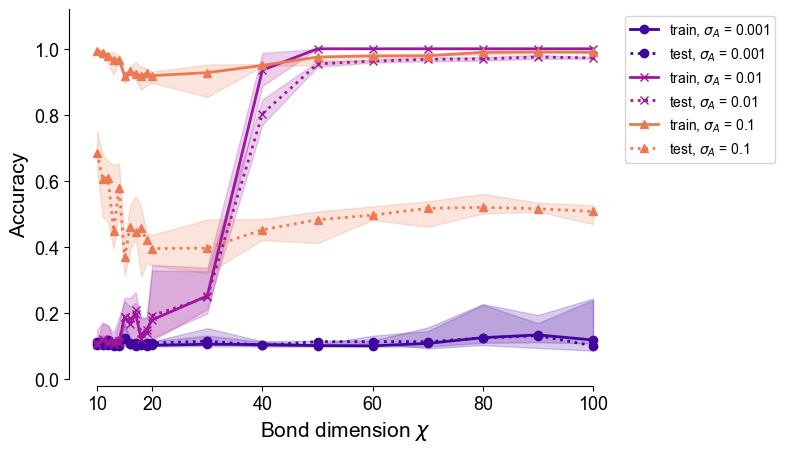

In [13]:
df = result_data_describe
stds = [0.001, 0.01, 0.1]
df = df.sort_values('d_bond')
markers=['o','x','^']
for i, std in enumerate(stds):
    df_std = df[df['std'] == std]
    plt.plot(df_std['d_bond'], df_std['train_acc_median'], marker=markers[i], label = f'train, $\sigma_A$ = {std}', color = cmaps[i], linestyle = 'solid', markersize=6, linewidth=2, clip_on=False)
    plt.fill_between(df_std['d_bond'], df_std['train_acc_25'], df_std['train_acc_75'], alpha=0.2, color=cmaps[i], clip_on=False)
    plt.plot(df_std['d_bond'], df_std['test_acc_median'], marker=markers[i], label = f'test, $\sigma_A$ = {std}', color = cmaps[i], linestyle = 'dotted', markersize=6, linewidth=2, clip_on=False)
    plt.fill_between(df_std['d_bond'],  df_std['test_acc_25'], df_std['test_acc_75'], alpha=0.2, color=cmaps[i], clip_on=False)

plt.xlabel('Bond dimension $\chi$', size=15)
plt.ylabel('Accuracy', size=15)
plt.xlim([10, 100])
plt.ylim([0, 1.12])

plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks([10, 20, 40, 60, 80, 100])
plt.tick_params(labelsize=13)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_2_a.pdf', bbox_inches='tight')

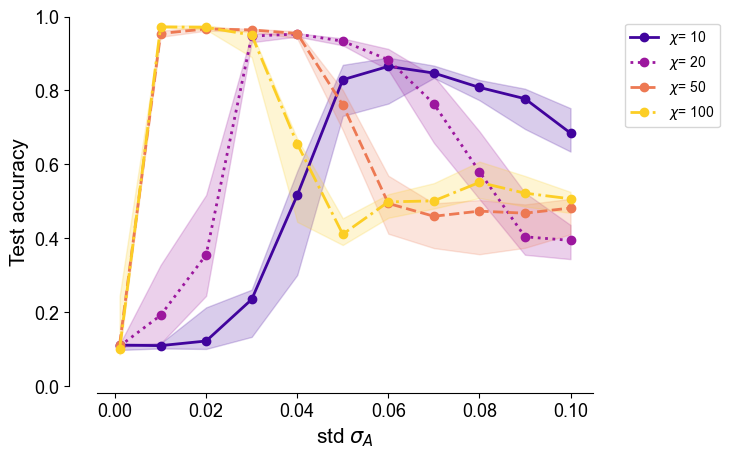

In [14]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for i, bond in enumerate(bonds):
    accuracys = result_data_describe[result_data_describe['d_bond'] == bond].sort_values('std')
    accuracy_median = accuracys['test_acc_median']
    accuracy_25 = accuracys['test_acc_25']
    accuracy_75 = accuracys['test_acc_75']
    plt.plot(stds, accuracy_median, label = f'$\chi$= {bond}', marker = 'o',linestyle=lines[bond], color=cmaps[i], linewidth=2)
    plt.fill_between(stds, accuracy_25, accuracy_75, alpha=0.2, color=cmaps[i])


plt.legend()
plt.xlabel('std $\sigma_A$', size=15)
plt.ylabel('Test accuracy', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim([0, 1])
plt.tick_params(labelsize=13)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('results/figure/figure_2_b.pdf', bbox_inches='tight')

## Entanglement Entropy vs Accuracy

In [15]:
result_data = result_data.rename({'d_bond' : 'bond'}, axis=1)

In [16]:
df_merge = pd.merge(df_entropy, result_data, how='inner', on=['bond', 'std', 'seed'])

In [17]:
df_merge

,index,bond,std,seed,entropy,h_size,train_acc,test_acc
0,0,10,0.001,0,5.426323e-08,1000,0.096729,0.113889
1,1,10,0.010,0,3.479963e-04,1000,0.107168,0.080556
2,2,10,0.020,0,4.856998e-03,1000,0.196242,0.216667
3,3,10,0.030,0,2.434493e-02,1000,0.242867,0.244444
4,4,10,0.040,0,8.218355e-02,1000,0.249130,0.291667
...,...,...,...,...,...,...,...,...
2085,2085,100,0.060,9,4.025109e+00,1000,0.926235,0.452778
2086,2086,100,0.070,9,4.062499e+00,1000,0.966597,0.494444
2087,2087,100,0.080,9,4.085795e+00,1000,0.979819,0.608333
2088,2088,100,0.090,9,4.102080e+00,1000,0.993737,0.577778


In [18]:
df_merge['gap'] = df_merge['train_acc'] - df_merge['test_acc']

In [19]:
df_merge_describe = df_merge[['bond', 'std', 'train_acc', 'test_acc', 'gap', 'entropy']].groupby(['bond', 'std']).agg(
                                                                                    train_acc_median=pd.NamedAgg(column='train_acc', aggfunc='median'),
                                                                                    train_acc_25=pd.NamedAgg(column='train_acc', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    train_acc_75=pd.NamedAgg(column='train_acc', aggfunc=lambda x : np.percentile(x, 75)),
                                                                                    test_acc_median=pd.NamedAgg(column='test_acc', aggfunc='median'),
                                                                                    test_acc_25=pd.NamedAgg(column='test_acc', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    test_acc_75=pd.NamedAgg(column='test_acc', aggfunc=lambda x : np.percentile(x, 75)),
                                                                                    gap_median=pd.NamedAgg(column='gap', aggfunc='median'),
                                                                                    gap_25=pd.NamedAgg(column='gap', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    gap_75=pd.NamedAgg(column='gap', aggfunc=lambda x : np.percentile(x, 75)),
                                                                                    entropy_median=pd.NamedAgg(column='entropy', aggfunc='median'),
                                                                                    entropy_25=pd.NamedAgg(column='entropy', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    entropy_75=pd.NamedAgg(column='entropy', aggfunc=lambda x : np.percentile(x, 75))
                                                                                    ).reset_index()

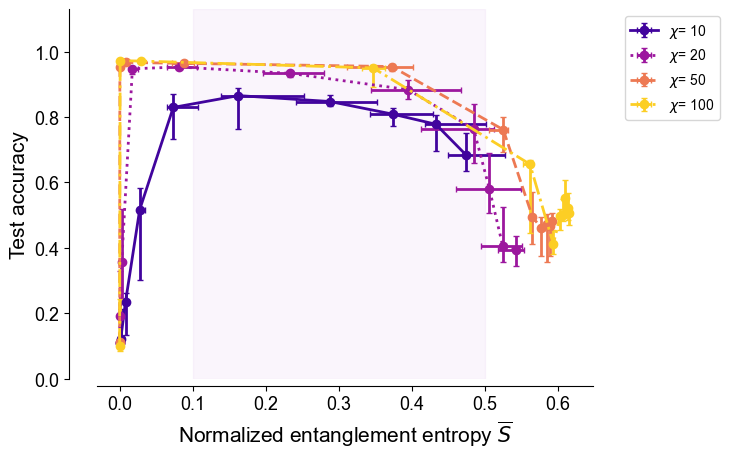

In [20]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}

for i, bond in enumerate(bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_75']
    accuracy_median = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_median']
    accuracy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_25']
    accuracy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_75']
    plt.errorbar(entropy_median/log(bond,2), accuracy_median, label = f'$\chi$= {bond}', marker = 'o',linestyle=lines[bond],
                xerr=np.stack([(entropy_median - entropy_25) / log(bond,2), (entropy_75 - entropy_median) / log(bond,2)]),
                yerr=np.stack([accuracy_median - accuracy_25, accuracy_75 - accuracy_median]), capsize=2, color=cmaps[i], linewidth=2)

plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.1)

plt.legend()
plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel('Test accuracy', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim([0, 1.13])
plt.tick_params(labelsize=13)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

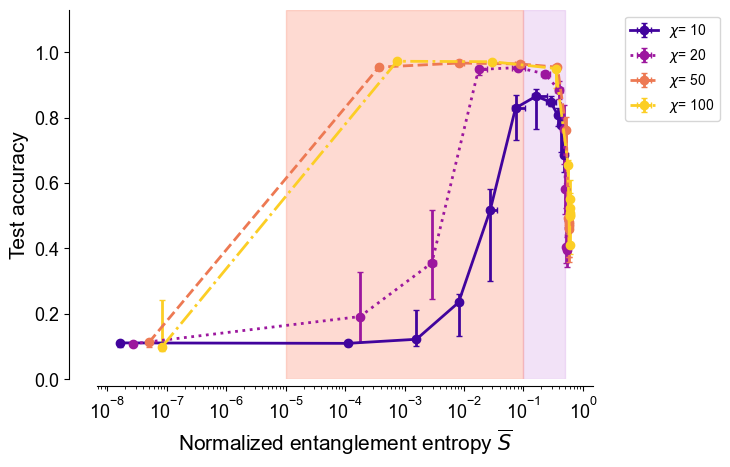

In [21]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}

for i, bond in enumerate(bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_75']
    accuracy_median = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_median']
    accuracy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_25']
    accuracy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['test_acc_75']
    plt.errorbar(entropy_median/log(bond,2), accuracy_median, label = f'$\chi$= {bond}', marker = 'o',linestyle=lines[bond],
                xerr=np.stack([(entropy_median - entropy_25) / log(bond,2), (entropy_75 - entropy_median) / log(bond,2)]),
                yerr=np.stack([accuracy_median - accuracy_25, accuracy_75 - accuracy_median]), capsize=2, color=cmaps[i], linewidth=2)

plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)
plt.xscale('log')

plt.legend()
plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel('Test accuracy', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim([0, 1.13])
plt.tick_params(labelsize=13)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_9_c.pdf', bbox_inches='tight')

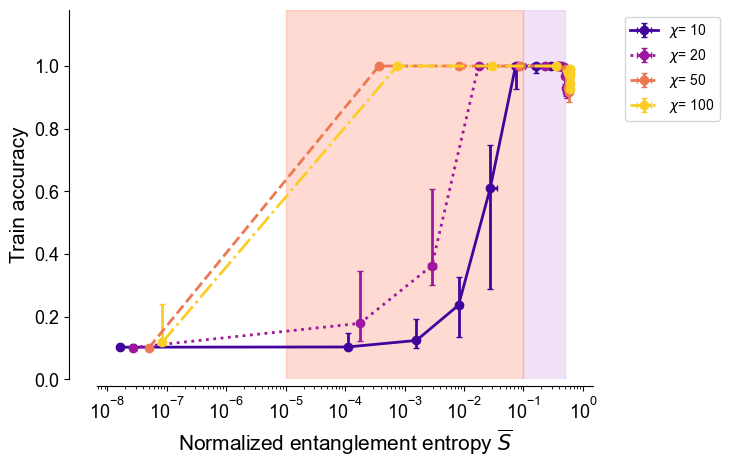

In [22]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}

for i, bond in enumerate(bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_75']
    accuracy_median = df_merge_describe[df_merge_describe['bond'] == bond]['train_acc_median']
    accuracy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['train_acc_25']
    accuracy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['train_acc_75']
    plt.errorbar(entropy_median/log(bond,2), accuracy_median, label = f'$\chi$= {bond}', marker = 'o',linestyle=lines[bond],
                xerr=np.stack([(entropy_median - entropy_25) / log(bond,2), (entropy_75 - entropy_median) / log(bond,2)]),
                yerr=np.stack([accuracy_median - accuracy_25, accuracy_75 - accuracy_median]), capsize=2, color=cmaps[i], linewidth=2)
plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)
plt.xscale('log')

plt.legend()
plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel('Train accuracy', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim([0, 1.18])
plt.tick_params(labelsize=13)
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

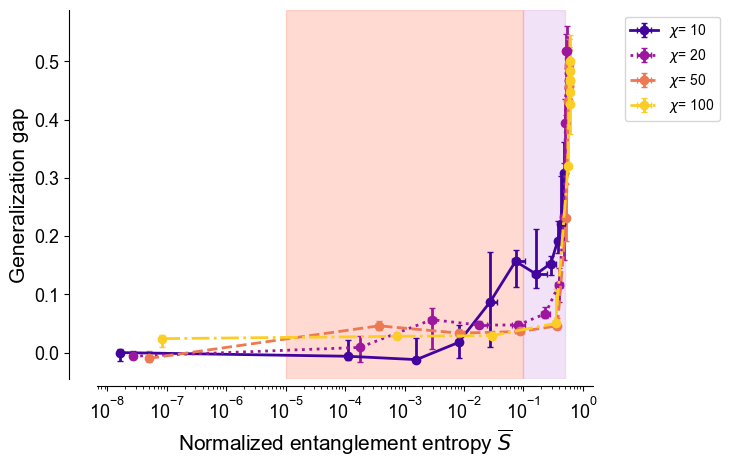

In [23]:
bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}

for i, bond in enumerate(bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == bond]['entropy_75']
    gap_median = df_merge_describe[df_merge_describe['bond'] == bond]['gap_median']
    gap_25 = df_merge_describe[df_merge_describe['bond'] == bond]['gap_25']
    gap_75 = df_merge_describe[df_merge_describe['bond'] == bond]['gap_75']
    plt.errorbar(entropy_median/log(bond,2), gap_median, label = f'$\chi$= {bond}', marker = 'o',linestyle=lines[bond],
                xerr=np.stack([(entropy_median - entropy_25) / log(bond,2), (entropy_75 - entropy_median) / log(bond,2)]),
                yerr=np.stack([gap_median - gap_25, gap_75 - gap_median]), capsize=2, color=cmaps[i], linewidth=2)
plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)
plt.xscale('log')

plt.legend()
plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel('Generalization gap', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.tick_params(labelsize=13)

plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

## Phase diagram

In [24]:
# load binary order parameter
save_array = np.load('../order_parameter/results/RadOrderParameter.npz')
X1 = save_array['X']
Y1 = save_array['Y']
Z1 = save_array['Z']

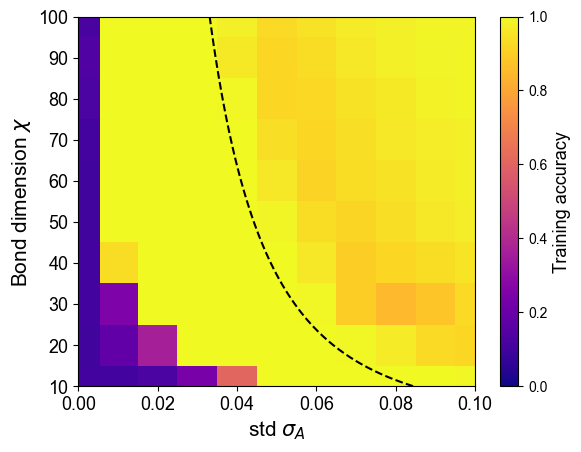

In [25]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),11))
Y=np.zeros((len(bonds),11))
Z=np.zeros((len(bonds),11))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


for i in range(len(bonds)):
    bond=bonds[i]
    accuracys = result_data_describe[result_data_describe['d_bond'] == bond].sort_values('std')['train_acc_median']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=accuracys[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,vmin=0,vmax=1,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('Training accuracy', size=13)

ax.contour(X1,Y1,Z1,[125],linestyles='dashed',colors='black')

plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=13)

plt.ylim([10,100])
plt.xlim([0,0.1])
plt.savefig('results/figure/figure_4_a.pdf', bbox_inches='tight')

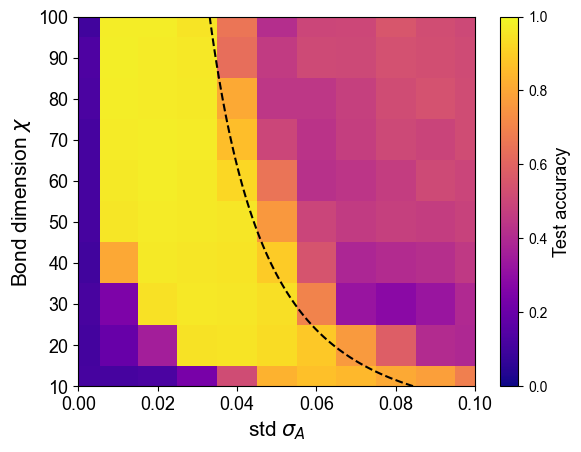

In [27]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),11))
Y=np.zeros((len(bonds),11))
Z=np.zeros((len(bonds),11))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


for i in range(len(bonds)):
    bond=bonds[i]
    accuracys = result_data_describe[result_data_describe['d_bond'] == bond].sort_values('std')['test_acc_median']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=accuracys[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,vmin=0,vmax=1,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('Test accuracy', size=13)

ax.contour(X1,Y1,Z1,[125],linestyles='dashed',colors='black')

plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=13)

plt.ylim([10,100])
plt.xlim([0,0.1])
plt.savefig('results/figure/figure_4_b.pdf', bbox_inches='tight')

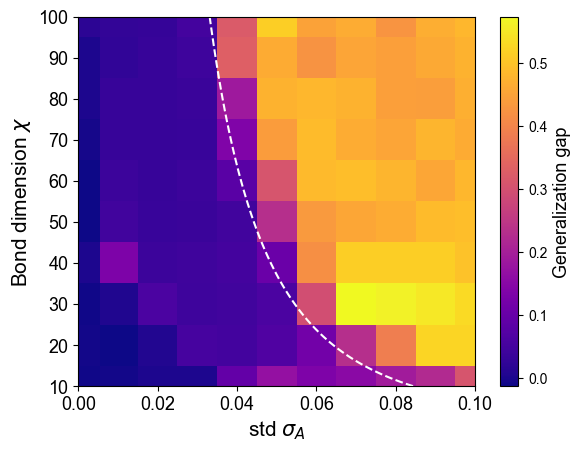

In [29]:
X=np.zeros((len(bonds),11))
Y=np.zeros((len(bonds),11))
Z=np.zeros((len(bonds),11))

for i in range(len(bonds)):
    bond=bonds[i]
    accuracys = result_data_describe[result_data_describe['d_bond'] == bond].sort_values('std')
    gap=accuracys['train_acc_median']-accuracys['test_acc_median']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=gap[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('Generalization gap', size=13)

ax.contour(X1,Y1,Z1,[125],linestyles='dashed',colors='w')

plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=13)

plt.ylim([10,100])
plt.xlim([0,0.1])
plt.savefig('results/figure/figure_4_c.pdf', bbox_inches='tight')